## Section 1: Importing Libraries and Loading Data


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#### Load the dataset


In [115]:
df=pd.read_csv('C:/Users/orIGINAL/Downloads/diabetes.CSV')

In [119]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [123]:
# Display the first 5 rows of the DataFrame
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Section 2: Data Wrangling (Data Cleaning & Preprocessing)


In [133]:
# Check for missing data
df[df.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [131]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Removeing duplicates

In [137]:
# Check for duplicate rows
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# As per the initial checks, there are no missing or duplicate values.

## Section 3: Exploratory Data Analysis (EDA)


In [141]:
# Display descriptive statistics for all columns, transposed for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,769.0,3.840052,3.370237,0.000,1.000,3.000,6.000,17.00
Glucose,769.0,120.897269,31.951886,0.000,99.000,117.000,140.000,199.00
BloodPressure,769.0,69.115735,19.345296,0.000,62.000,72.000,80.000,122.00
SkinThickness,769.0,20.509753,15.959020,0.000,0.000,23.000,32.000,99.00
Insulin,769.0,79.697009,115.203999,0.000,0.000,29.000,127.000,846.00
BMI,769.0,31.998179,7.880557,0.000,27.300,32.000,36.600,67.10
DiabetesPedigreeFunction,769.0,0.471590,0.331208,0.078,0.244,0.371,0.626,2.42
Age,769.0,33.269181,11.778737,21.000,24.000,29.000,41.000,81.00
Outcome,769.0,0.349805,0.477219,0.000,0.000,0.000,1.000,1.00


#### Calculate and print the percentage of individuals with diabetes (Outcome = 1)



In [148]:
diabetes_percentage = (df['Outcome'].sum() / len(df)) * 100
print(f"\nPercentage of individuals with diabetes in the dataset: {diabetes_percentage:.2f}%")



Percentage of individuals with diabetes in the dataset: 34.98%


### Plotting distributions of all numerical features


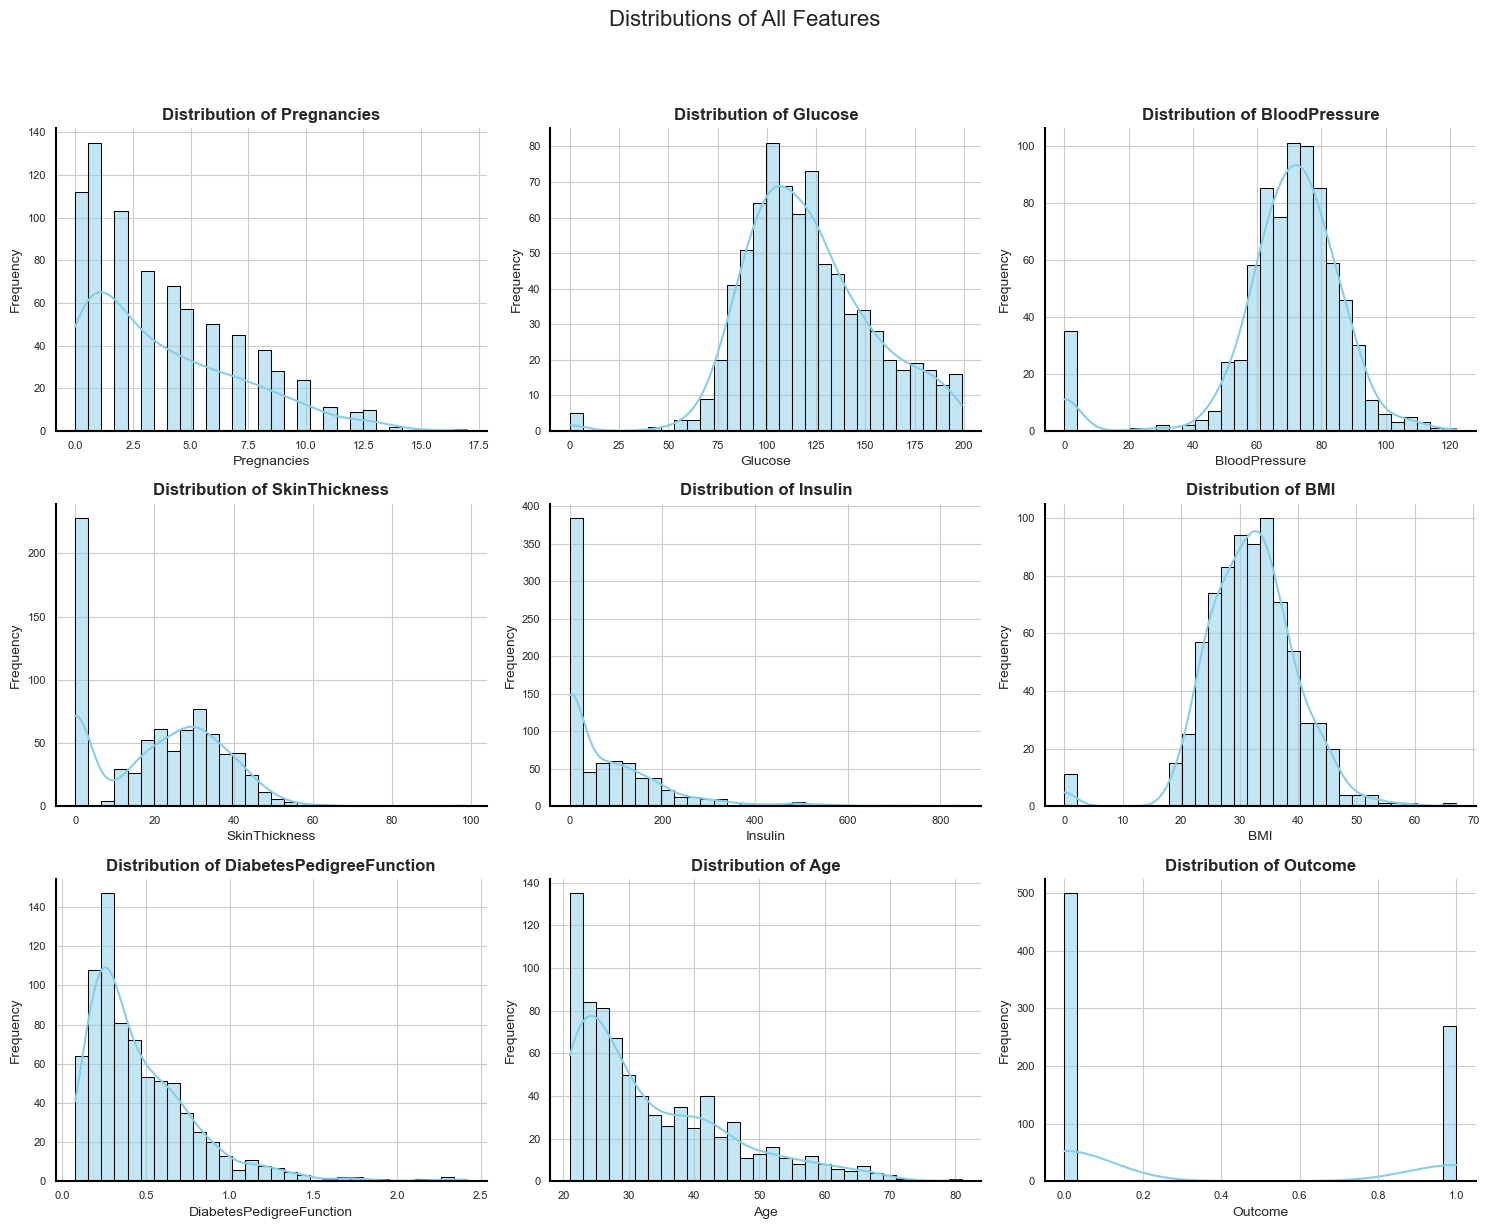

In [151]:
num_cols = len(df.columns)
cols_per_row = 3 
rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0) 

plt.figure(figsize=(cols_per_row * 5, rows * 4)) 

for i, col in enumerate(df.columns):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.histplot(x=col, data=df, bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    ax = plt.gca()
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle("Distributions of All Features", fontsize=16, y=1.02) 
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()


#### Distribution of Diabetes Outcome (Outcome: 0 = No Diabetes, 1 = Diabetes)


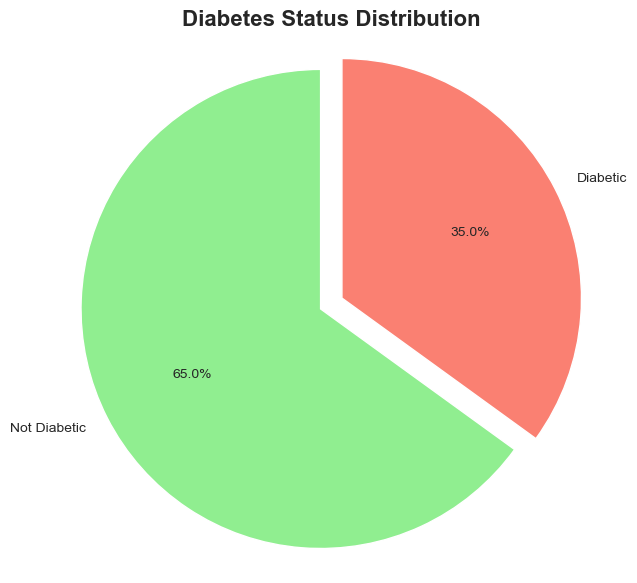

In [154]:
counts = df['Outcome'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(x=counts, labels=['Not Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, explode=(0.05, 0.05), colors=['lightgreen', 'salmon'])
plt.title('Diabetes Status Distribution', fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.show()


#### Diabetes Distribution Among High BMI Individuals (BMI >= 30)


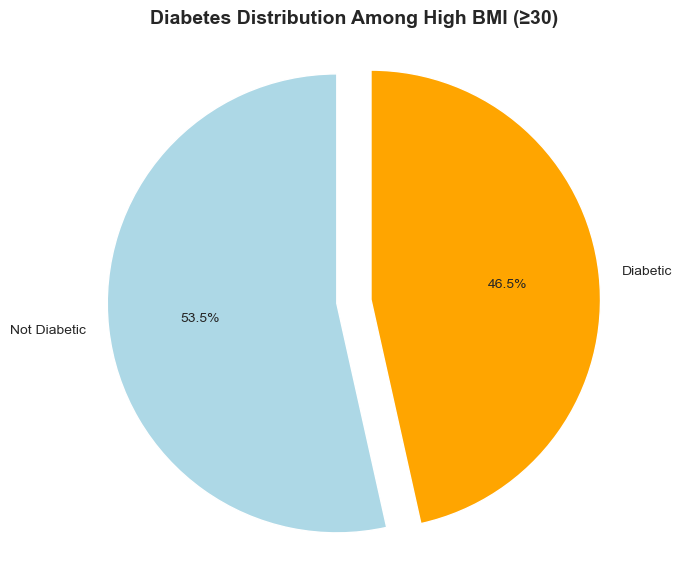

In [157]:
high_bmi = df[df['BMI'] >= 30]
counts_high_bmi = high_bmi['Outcome'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(x=counts_high_bmi, labels=['Not Diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90, explode=(0.05, 0.1), colors=['lightblue', 'orange'])
plt.title('Diabetes Distribution Among High BMI (≥30)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

#### Boxplots for key numerical features to identify outliers and spread


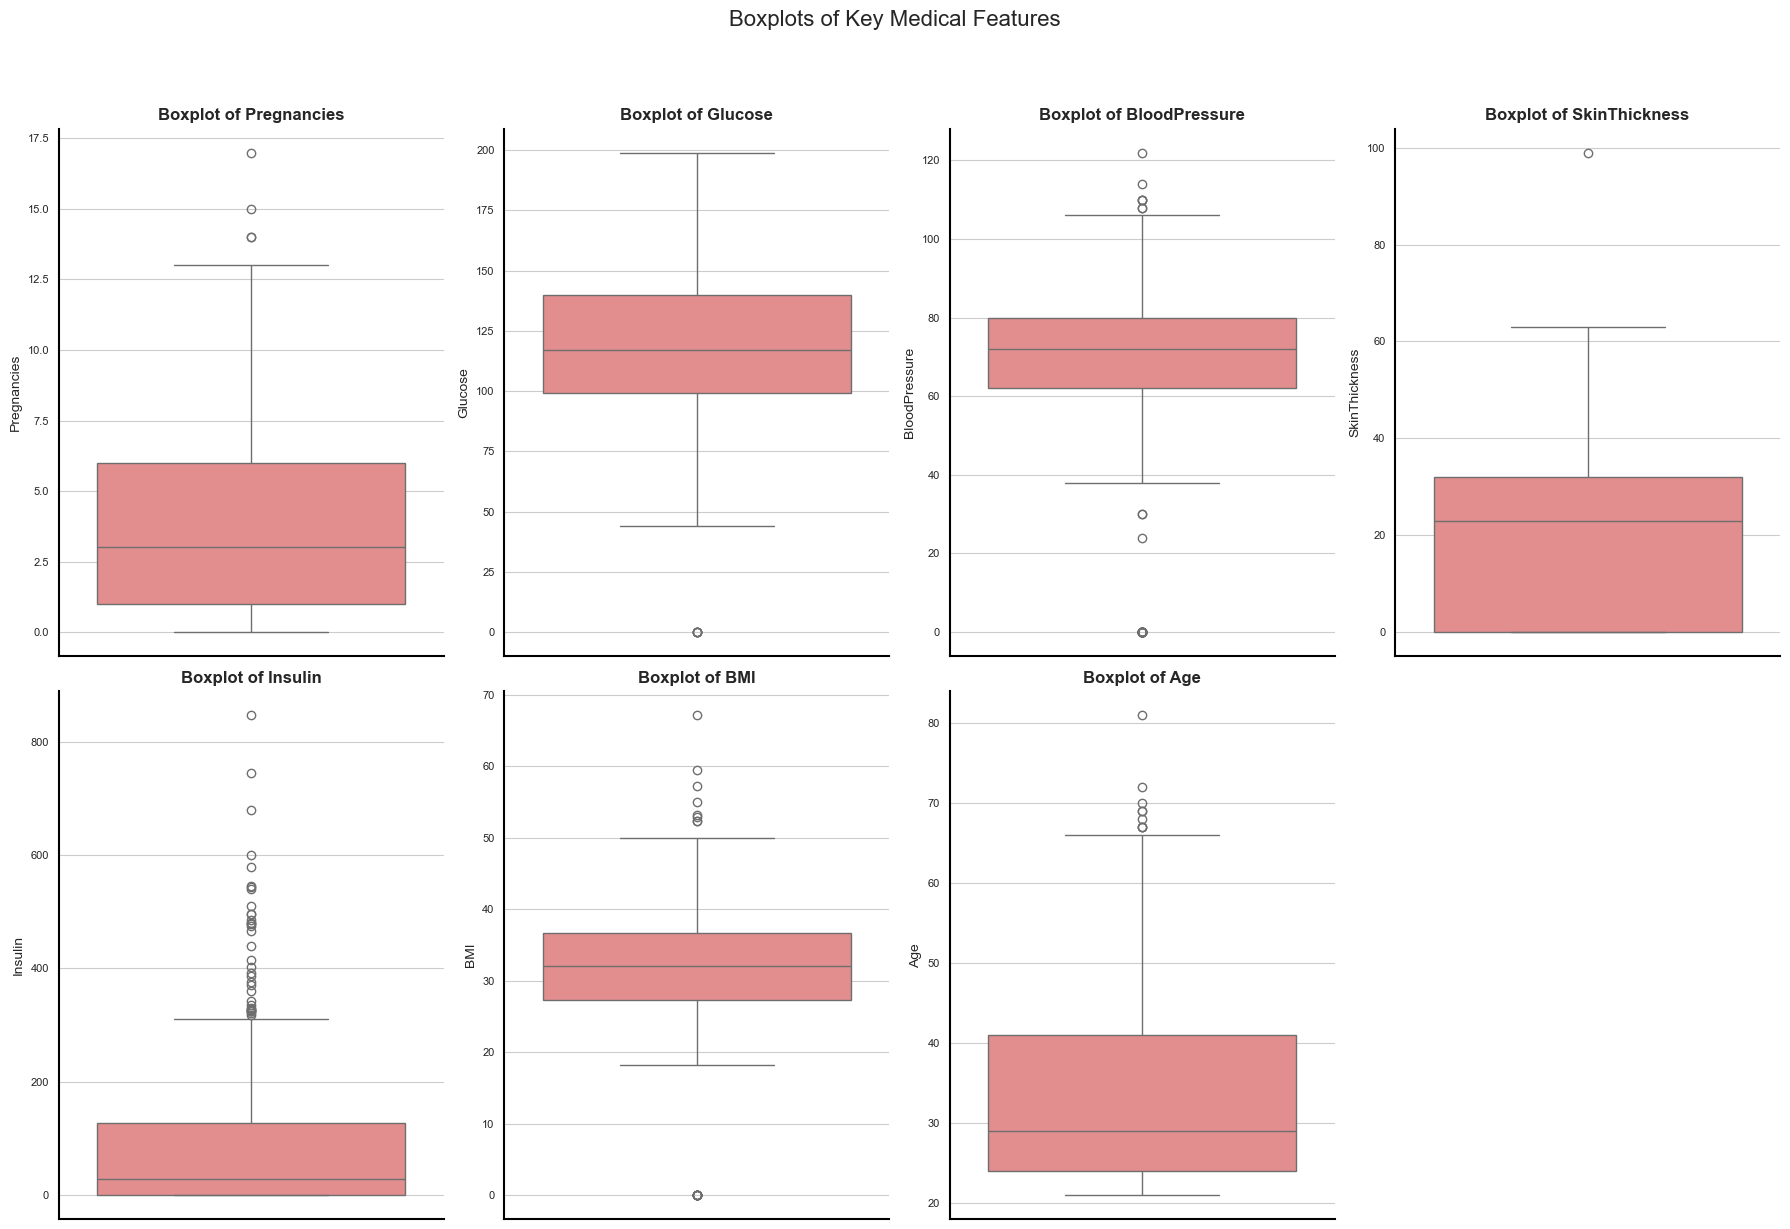

In [160]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1) 
    sns.boxplot(y=col, data=df, color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    plt.ylabel(col, fontsize=10)
    plt.yticks(fontsize=8)
    ax = plt.gca()
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.suptitle("Boxplots of Key Medical Features", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

#### Correlation Heatmap


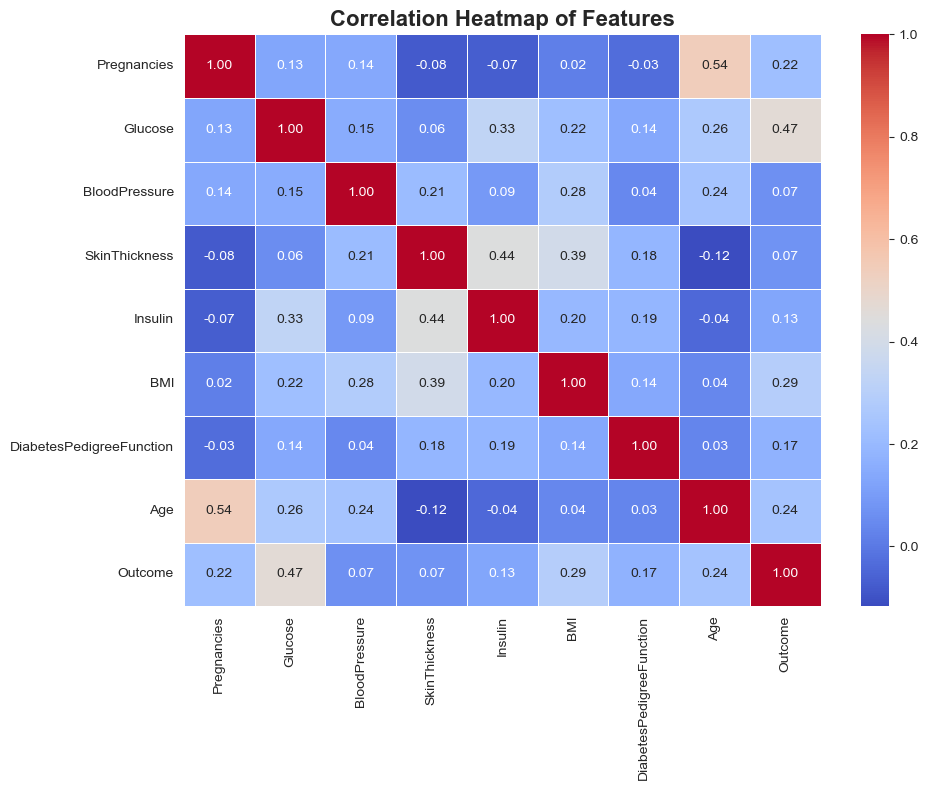

In [163]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features", fontsize=16, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

### Relationship Plots with Outcome


#### Glucose Levels by Diabetes Status (Outcome)


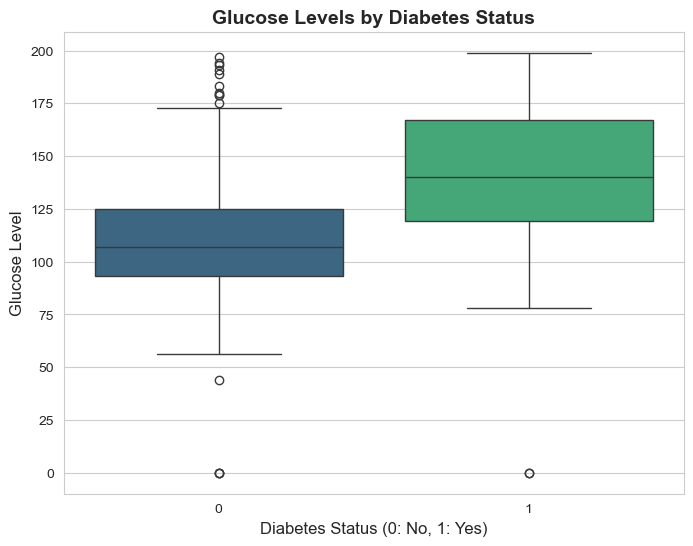

In [168]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='viridis')
plt.title('Glucose Levels by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Glucose Level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


#### Age vs. Glucose with Diabetes Status Hue


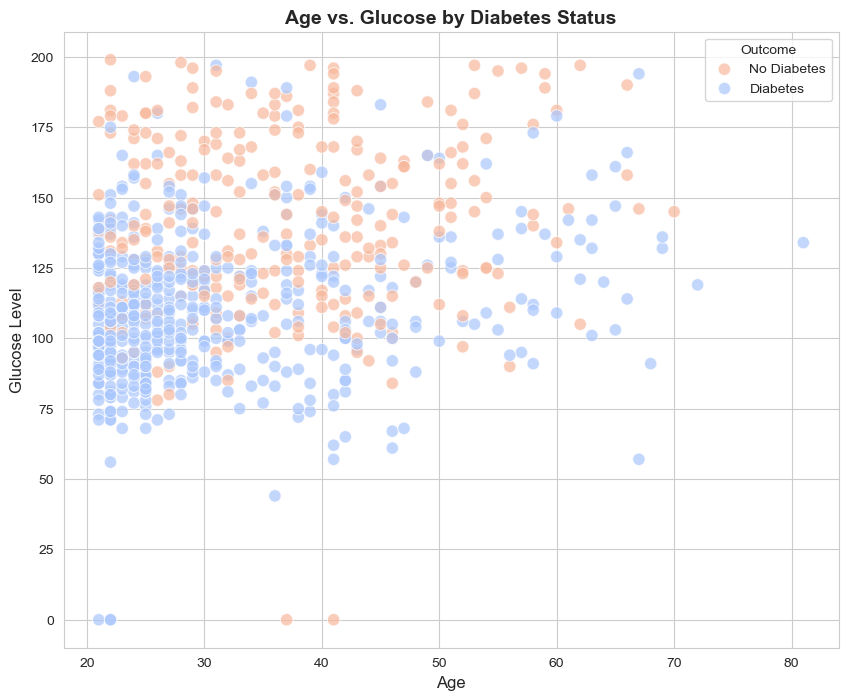

In [171]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette='coolwarm', s=80, alpha=0.7)
plt.title('Age vs. Glucose by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Glucose Level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

#### BMI by Diabetes Status (Outcome)


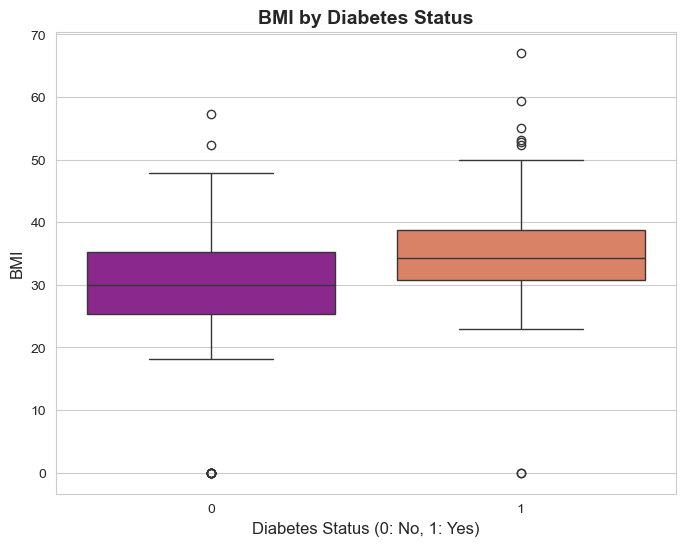

In [174]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='plasma')
plt.title('BMI by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


#### BMI vs. BloodPressure with Diabetes Status Hue


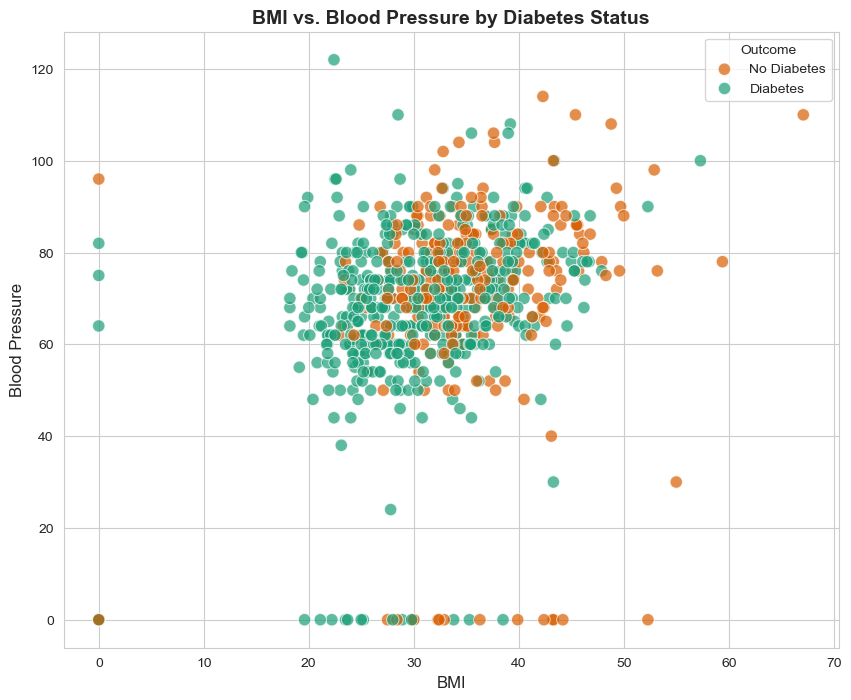

In [177]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BMI', y='BloodPressure', hue='Outcome', data=df, palette='Dark2', s=80, alpha=0.7)
plt.title('BMI vs. Blood Pressure by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()


#### Count of Diabetes Outcome (0: No, 1: Yes)


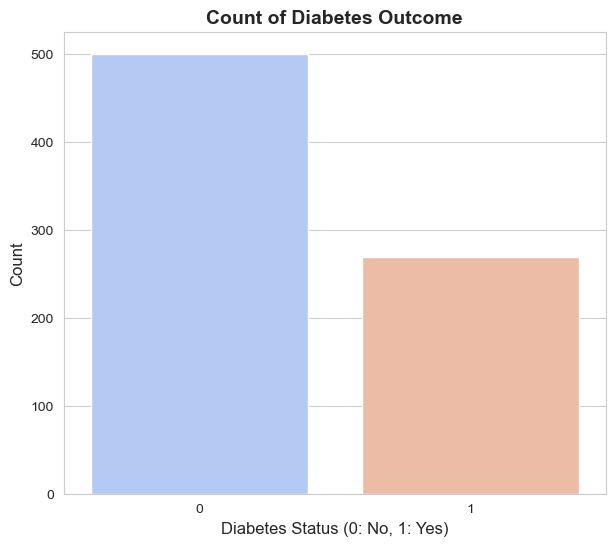

In [180]:
plt.figure(figsize=(7, 6))
sns.countplot(x='Outcome', data=df, palette='coolwarm')
plt.title('Count of Diabetes Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Pairplot of Selected Features (Glucose, BMI, Age) by Outcome


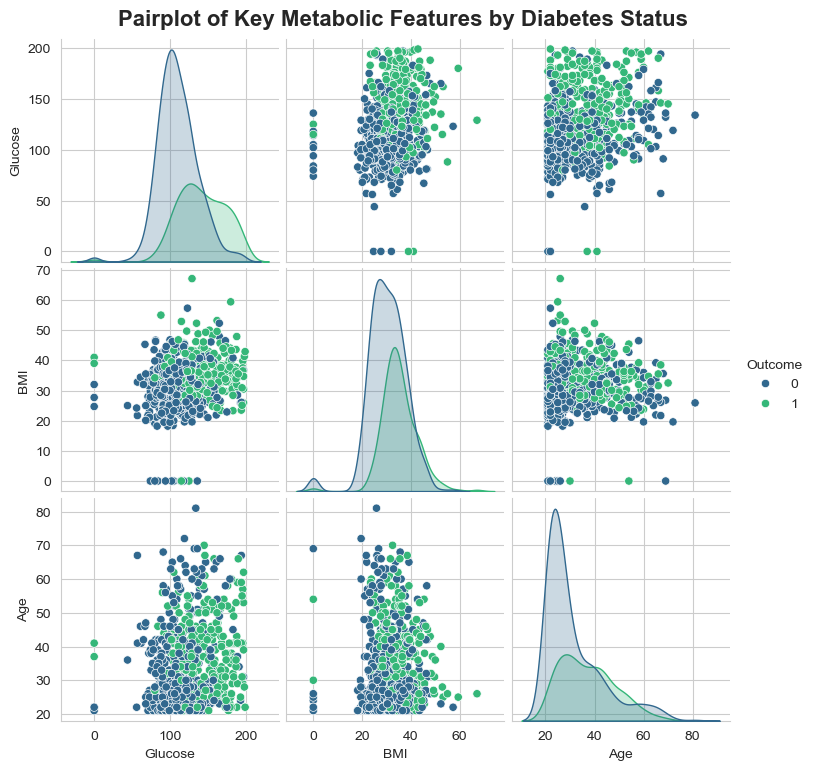

In [182]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome', palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot of Key Metabolic Features by Diabetes Status", y=1.02, fontsize=16, fontweight='bold')
plt.show()


#### Violin Plot for Insulin Distribution by Diabetes Outcome


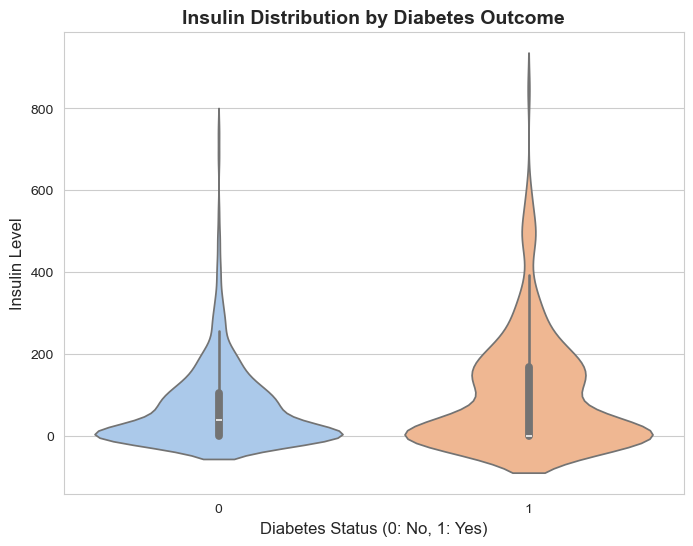

In [188]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Insulin', data=df, palette='pastel')
plt.title('Insulin Distribution by Diabetes Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Insulin Level', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Distribution Plot for DiabetesPedigreeFunction


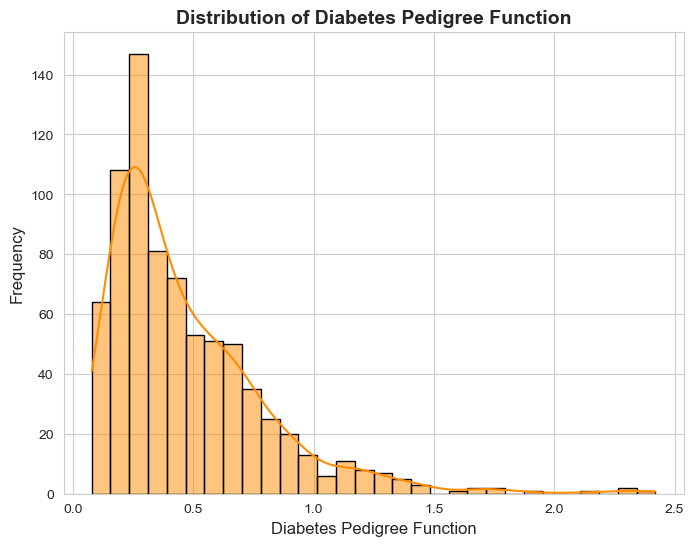

In [191]:
plt.figure(figsize=(8, 6))
sns.histplot(df['DiabetesPedigreeFunction'], kde=True, bins=30, color='darkorange', edgecolor='black')
plt.title("Distribution of Diabetes Pedigree Function", fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Pedigree Function', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Full Pairplot (can be computationally intensive for large datasets)


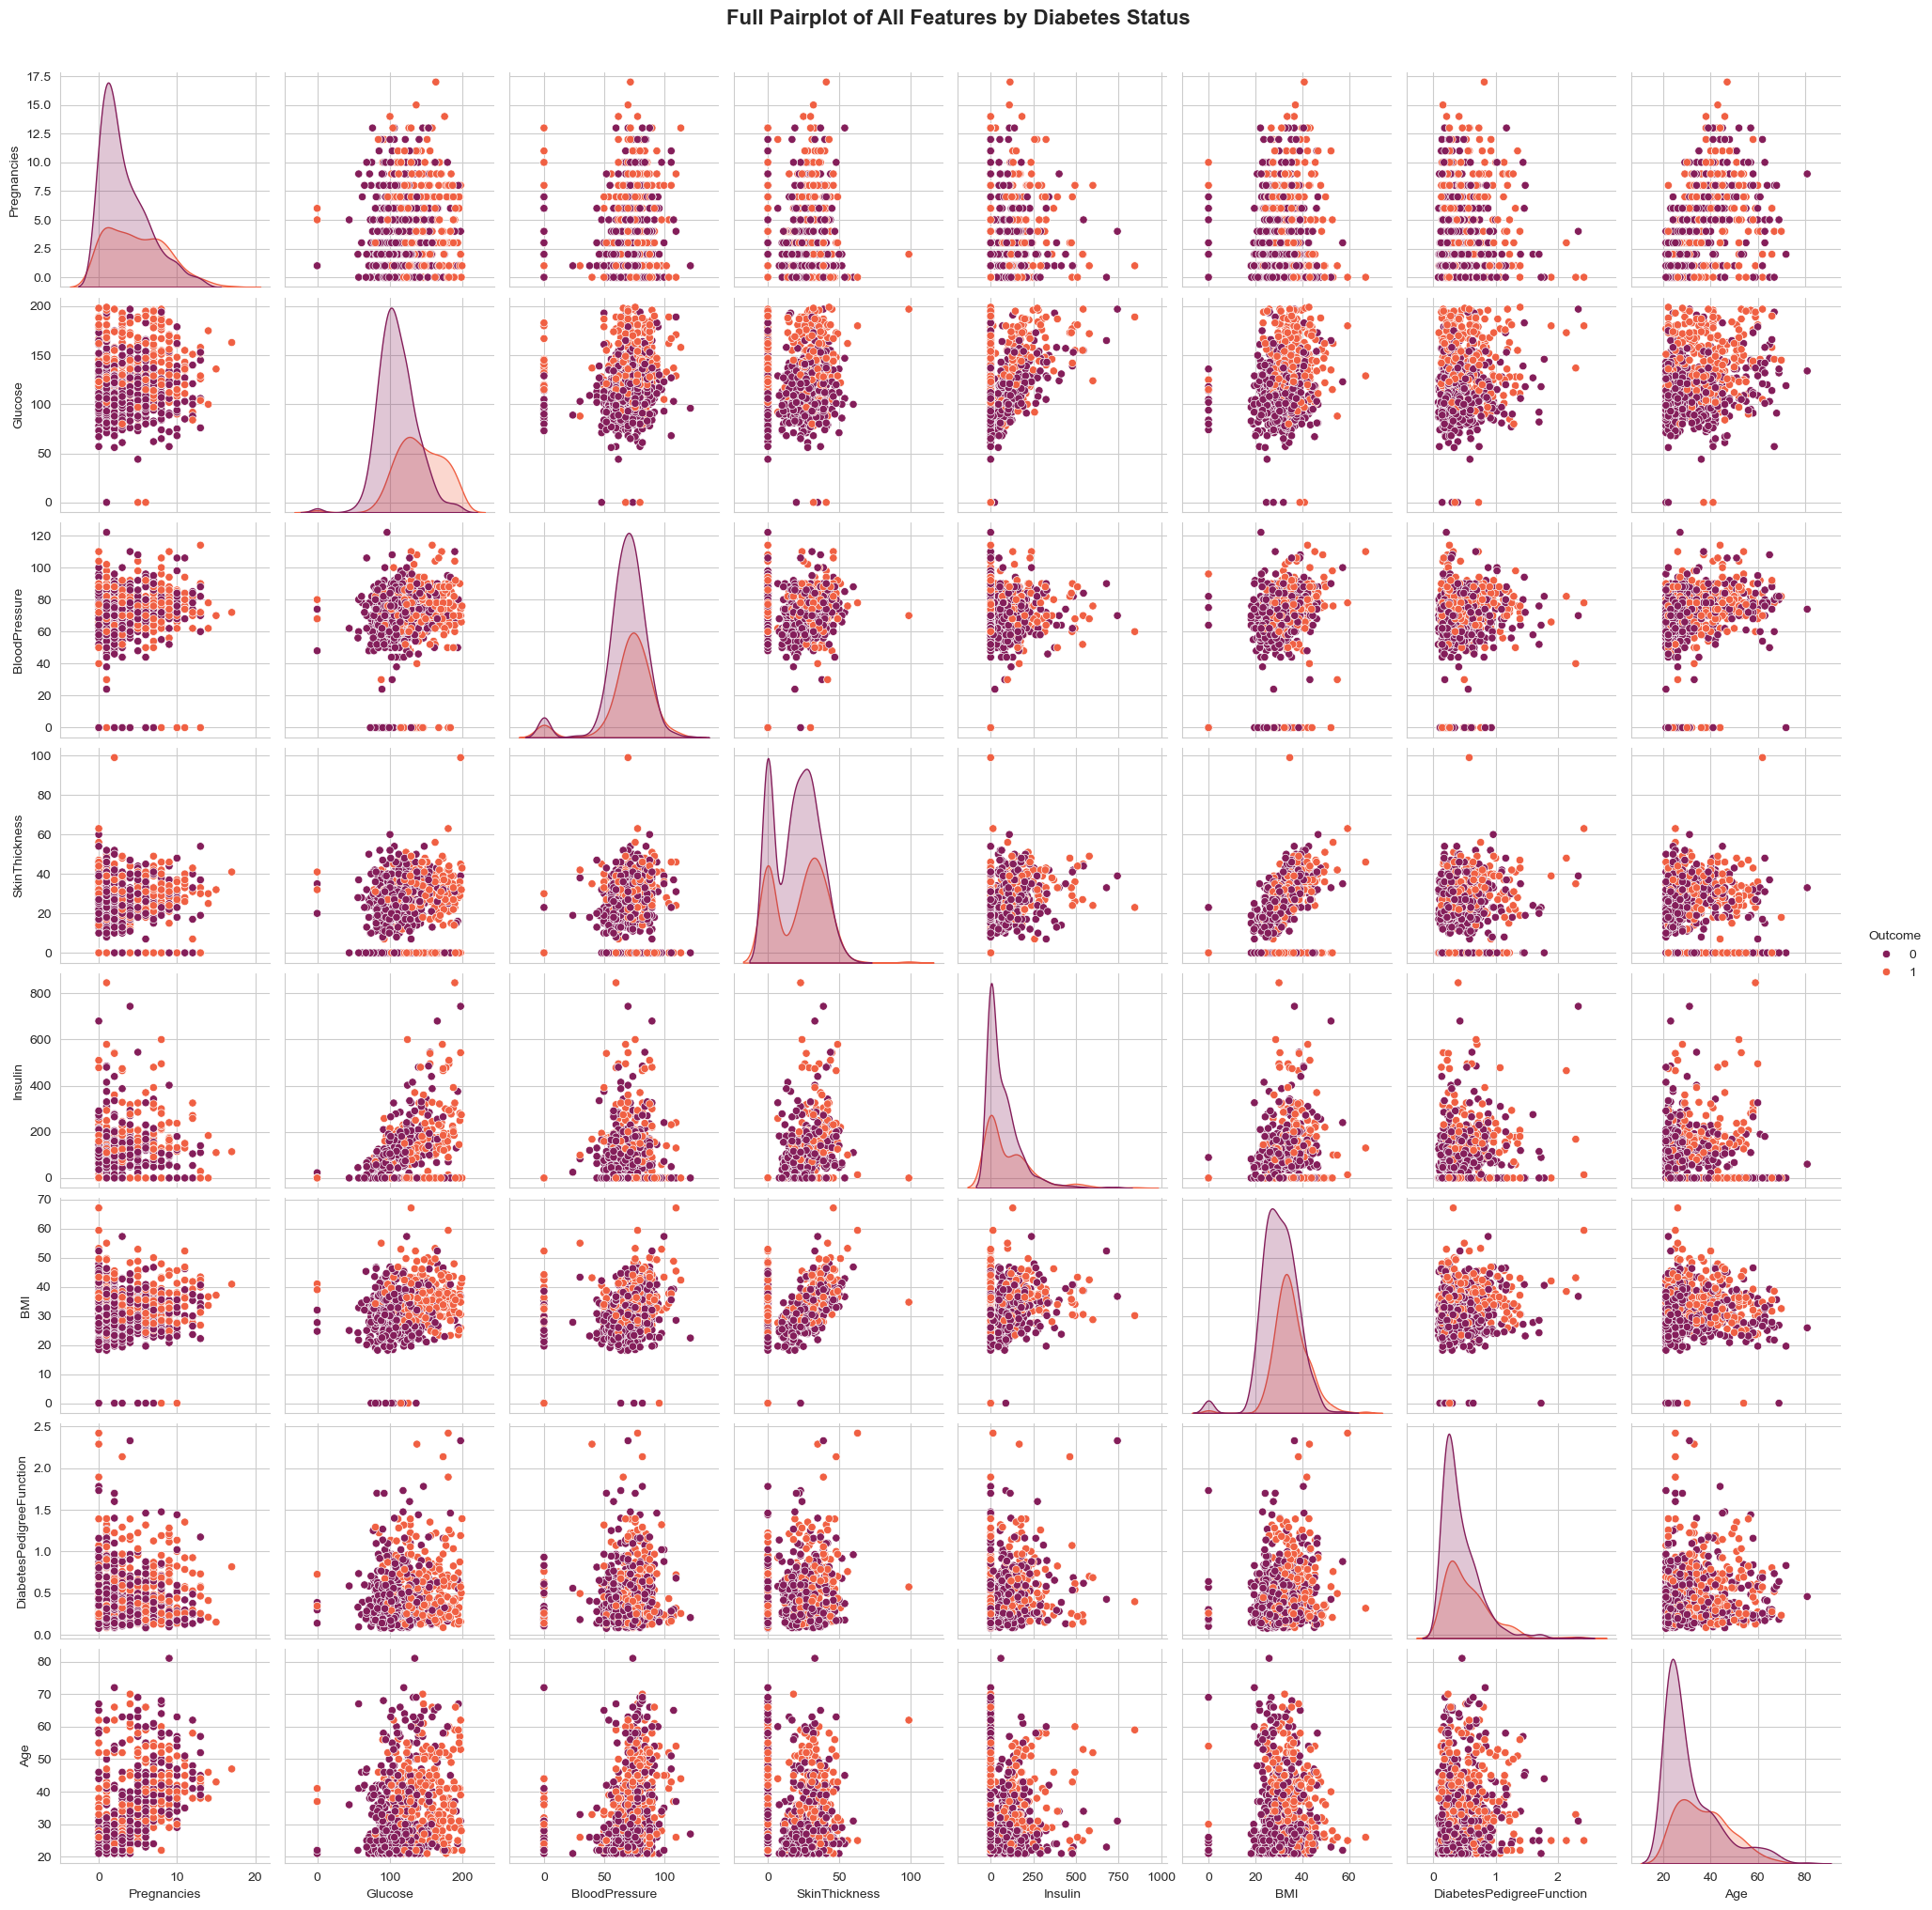

In [202]:
sns.pairplot(df, hue='Outcome', palette='rocket', diag_kind='kde')
plt.suptitle("Full Pairplot of All Features by Diabetes Status", y=1.02, fontsize=16, fontweight='bold')
plt.show()

### New Visualizations for Enhanced Analysis


#### Countplot of Pregnancies by Outcome


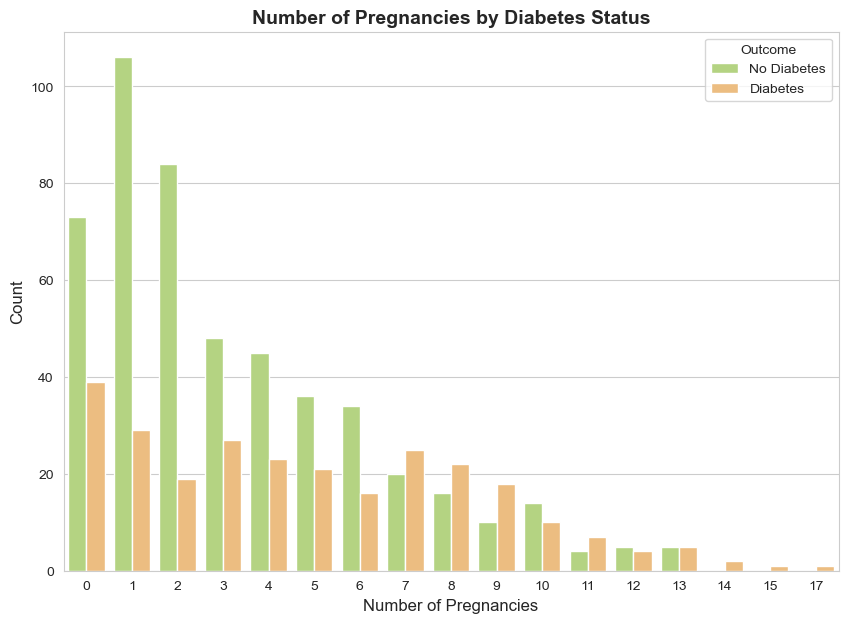

In [215]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Pregnancies', hue='Outcome', data=df, palette='RdYlGn_r')
plt.title('Number of Pregnancies by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Number of Pregnancies', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

#### Boxplot of Age by Outcome


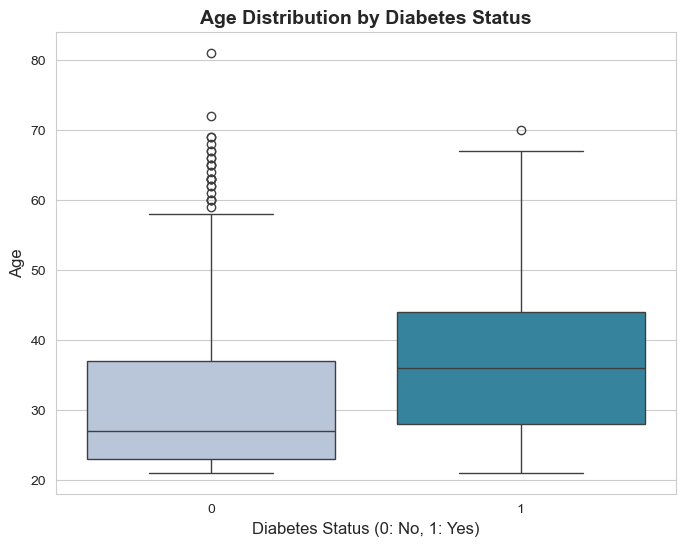

In [217]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=df, palette='PuBuGn')
plt.title('Age Distribution by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Scatter plot of Age vs. BMI colored by Outcome


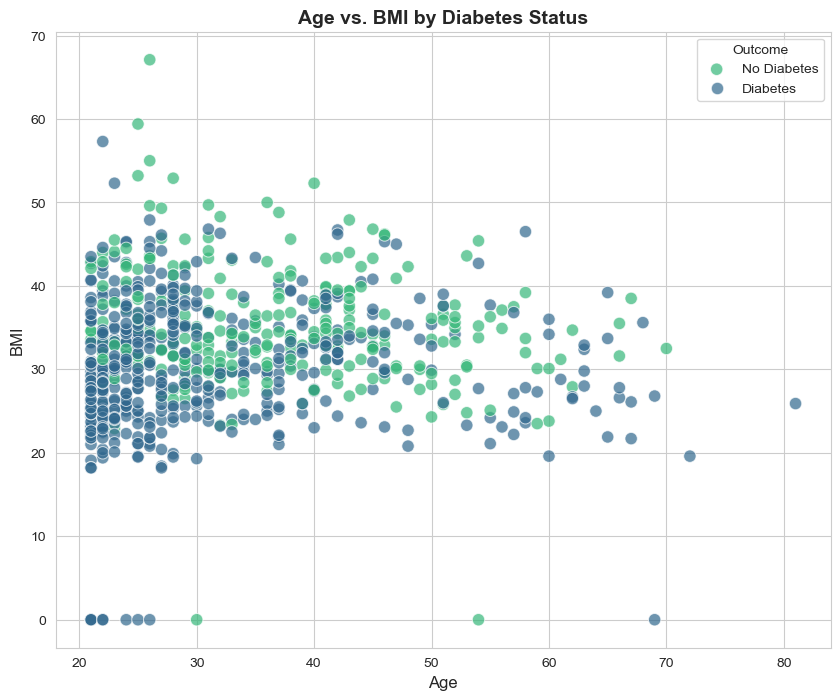

In [223]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df, palette='viridis', s=80, alpha=0.7)
plt.title('Age vs. BMI by Diabetes Status', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

#### Correlation of each feature with the 'Outcome' variable


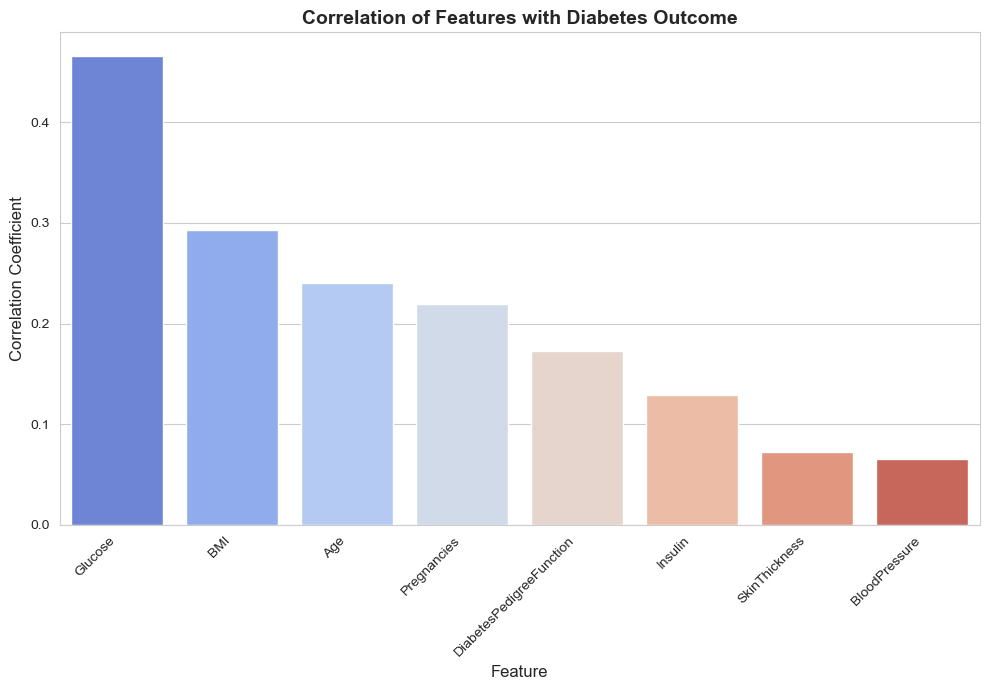

In [226]:
correlation_with_outcome = df.corr()['Outcome'].drop('Outcome').sort_values(ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x=correlation_with_outcome.index, y=correlation_with_outcome.values, palette='coolwarm')
plt.title('Correlation of Features with Diabetes Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()